#**Netflix Original Films and IMDB Scores Dataset**

##**Load Data**

In [18]:
# First and fore most dataset zip download garney then extract then upload in drive then
#navigate to drive/MyDrive/NetflixOriginal.csv   then copy path

#import section
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#paste the copied path here yeta we used encoding='latin1' to avoid UnicodeDecodeError
df = pd.read_csv("/content/drive/MyDrive/NetflixOriginals.csv", encoding='latin1')

#aba check if the dataset is loaded sucessfully by printing the first 5 rows
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


#**Data Profiling** ***/Understanding Structures and types***   

In [7]:
#Data Profiling
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB
None


In [8]:
print(df.describe())

          Runtime  IMDB Score
count  584.000000  584.000000
mean    93.577055    6.271747
std     27.761683    0.979256
min      4.000000    2.500000
25%     86.000000    5.700000
50%     97.000000    6.350000
75%    108.000000    7.000000
max    209.000000    9.000000


In [9]:
print(df.value_counts())

Title                                                   Genre                  Premiere           Runtime  IMDB Score  Language       
Òlòt?ré                                                 Crime drama            October 2, 2020    106      5.5         English            1
#REALITYHIGH                                            Comedy                 September 8, 2017  99       5.2         English            1
13th                                                    Documentary            October 7, 2016    100      8.2         English            1
13th: A Conversation with Oprah Winfrey & Ava DuVernay  Aftershow / Interview  January 26, 2017   36       7.1         English            1
15 August                                               Comedy-drama           March 29, 2019     124      5.8         Marathi            1
                                                                                                                                         ..
A California Christmas   

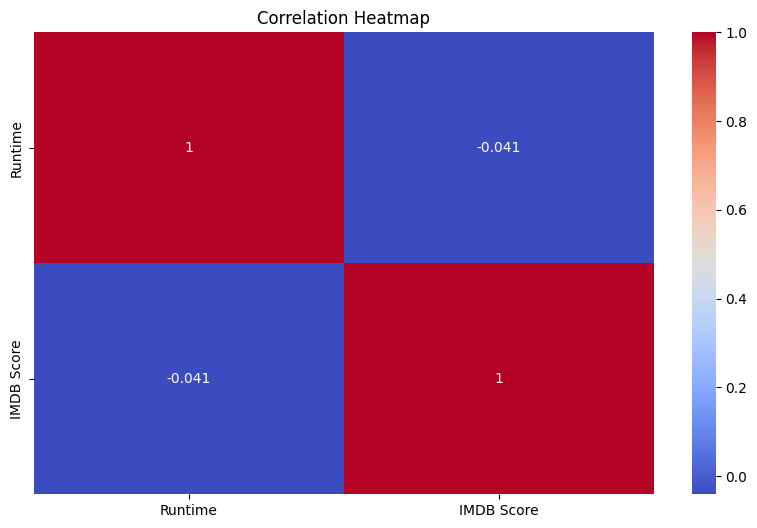

In [10]:
# Correlation matrix before any changes
# to show the difference between before and after EDA
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#**Handeling Missing values** ***/Data Quality Checks***

In [19]:
# Check total missing values per column
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64


In [12]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [20]:
# Check data types of each column
print(df.dtypes)


Title          object
Genre          object
Premiere       object
Runtime         int64
IMDB Score    float64
Language       object
dtype: object


In [17]:
# In DSA we do not change the main dsa but make a copy of the main dataset then edit the copy
df_copy = df.copy()

In [21]:
# Since most object ma xan so lets catogoriez them to  saves memory and improves performance.
#Converting string columns with repeated values to category
# by doing this it Saves memory and speeds up processing,

df_copy['Genre'] = df_copy['Genre'].astype('category')
df_copy['Language'] = df_copy['Language'].astype('category')

# Converting Premiere to datetime since This is currently object, but it's a date
# Enables us to use .dt accessor for operations
# like extracting year, month, filtering by date, etc.
df_copy['Premiere'] = pd.to_datetime(df_copy['Premiere'], errors='coerce')

# Numerical columns lai xoddinxam since they are already correct
#now lets recheck our datatypes
print(df_copy.dtypes)


Title                 object
Genre               category
Premiere      datetime64[ns]
Runtime                int64
IMDB Score           float64
Language            category
dtype: object


In [50]:
df_copy['Title'].nunique(), df_copy.shape[0]
#here since every title is unique with no repetition we should keep title as objects

(503, 503)

#**OUTLIER**

##***DETECTION***

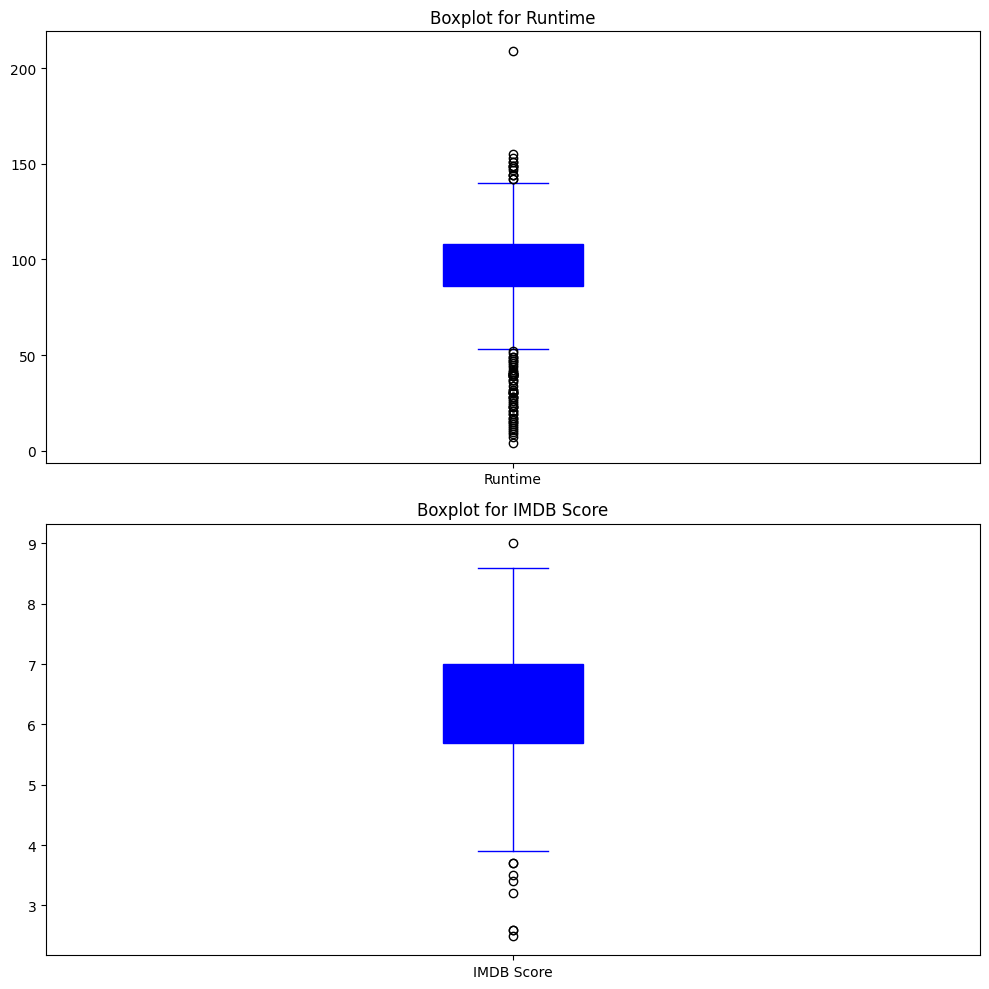

In [24]:
#Here we are using visualization method to detect outlires
# selects all columns in df_copy that are numeric, and stores them in a new DataFrame called numeric_cols.

numeric_cols = df_copy.select_dtypes(include='number')

# This line creates separate boxplots for each numeric column (e.g., Runtime, IMDB Score)
# sabai numeric columns ko lagi individual boxplots banaucha — eauta eauta plot eauta column ko lagi
# 'subplots=True' le garda each plot afnai subplot ma aaucha
# 'layout=(len(numeric_cols.columns), 1)' le vertical layout banaune (one plot per row)
# 'figsize=(10, 5 * len(numeric_cols.columns))' le graph size set garcha depending on number of columns
# 'sharex=False' le x-axis haru lai independent banaune (not shared)
# 'color=blue' le boxplot ko line color blue banaune
# 'patch_artist=True' le fill color allow garcha box ma
# 'title=[...]' le har eauta subplot ko title set garcha (e.g., "Boxplot for Runtime")

numeric_cols.plot(kind='box', subplots=True, layout=(len(numeric_cols.columns), 1),
                  figsize=(10, 5 * len(numeric_cols.columns)), sharex=False,
                  color='blue', patch_artist=True, title=[f'Boxplot for {col} ' for col in numeric_cols.columns])

plt.tight_layout()
plt.show()

##***HANDELING***

In [25]:
# Calculate IQR for a specific column (e.g., 'Runtime')
Q1 = df_copy['Runtime'].quantile(0.25)
Q3 = df_copy['Runtime'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_copy = df_copy[(df_copy["Runtime"]<=upper_bound) & (df_copy["Runtime"]>=lower_bound) ]

In [26]:
# Calculate IQR for a specific column (e.g., 'Runtime')
Q1 = df_copy['IMDB Score'].quantile(0.25)
Q3 = df_copy['IMDB Score'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_copy = df_copy[(df_copy["IMDB Score"]<=upper_bound) & (df_copy["IMDB Score"]>=lower_bound) ]

##Boxplot After Outlier Treatment

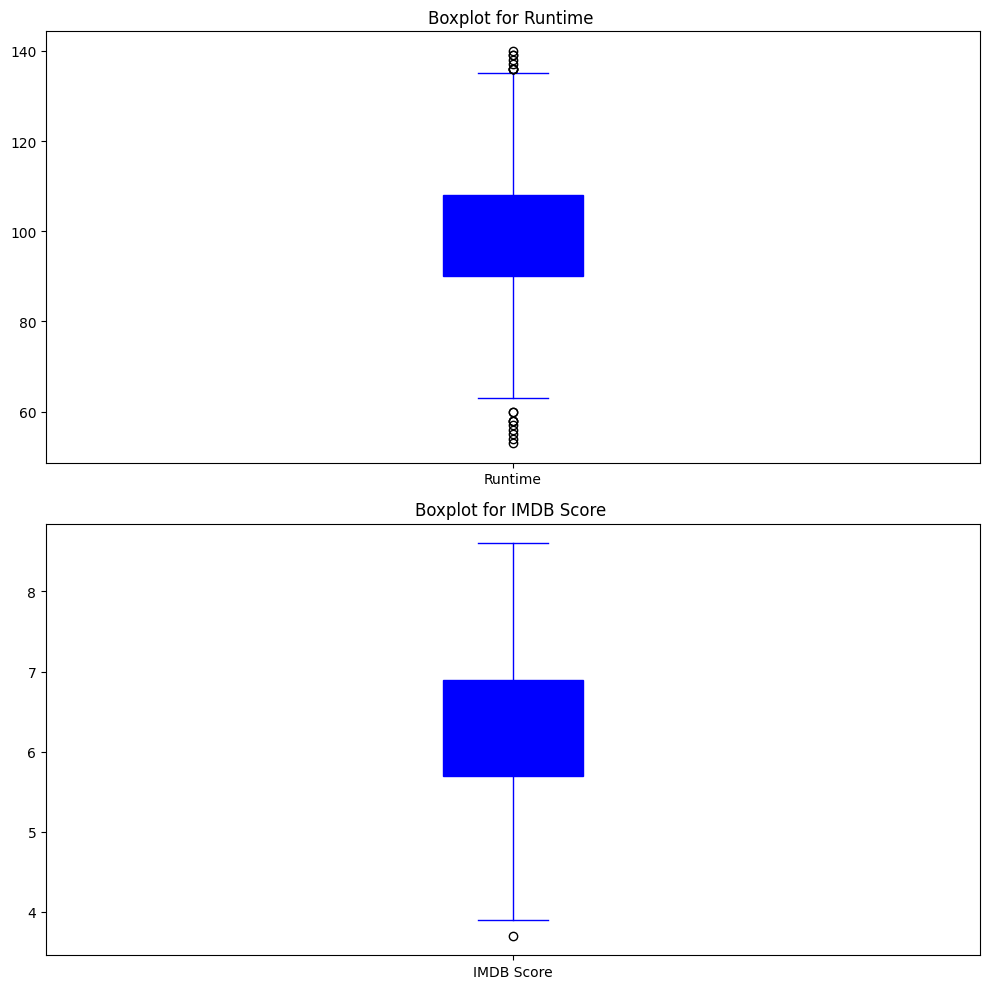

In [52]:
# yo code ma Outlier hataisakepachi data ko range ani distribution clearly dekhna sajilo huncha

numeric_cols = df_copy.select_dtypes(include='number')

numeric_cols.plot(kind='box', subplots=True, layout=(len(numeric_cols.columns), 1),
                  figsize=(10, 5 * len(numeric_cols.columns)), sharex=False,
                  color='blue', patch_artist=True, title=[f'Boxplot for {col} ' for col in numeric_cols.columns])

plt.tight_layout()
plt.show()

#**UNDERSTANDING RELATIONSHIPS**

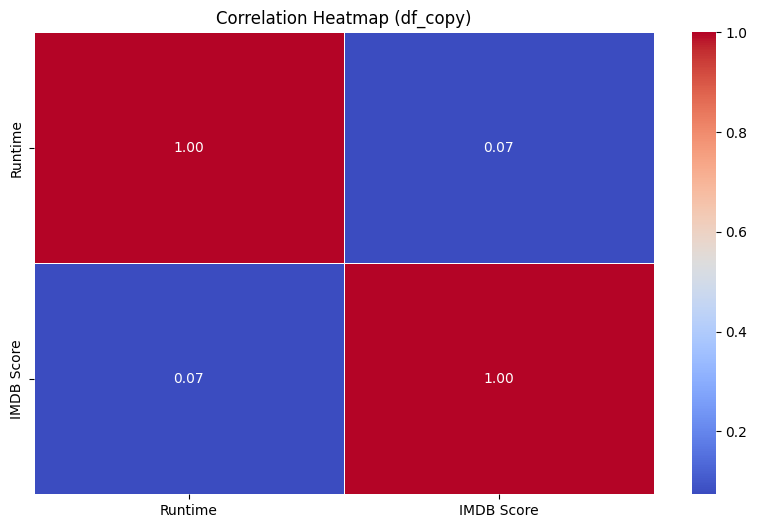


From the heatmap image, we can understand the following:

- Runtime and IMDB Score have a very weak positive correlation of 0.07.

- This means that as Runtime increases, IMDB Score does not significantly increase or decrease 
  there's almost no linear relationship between them.

- Each variable has a perfect correlation with itself (1.00), which is normal.



In [32]:
# This section helps understand relationships between numeric features like Runtime and IMDB Score
# Heatmap dekhaune correlation (kati related chan features)
# Regression plot and scatterplot le visually dekhaucha kasto sambandha cha between 2 variables

# Correlation Matrix for numeric columns
correlation_matrix_copy = df_copy.corr(numeric_only=True)

# Heatmap to visualize correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_copy, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (df_copy)')
plt.show()

print("""
From the heatmap image, we can understand the following:

- Runtime and IMDB Score have a very weak positive correlation of 0.07.

- This means that as Runtime increases, IMDB Score does not significantly increase or decrease
  there's almost no linear relationship between them.

- Each variable has a perfect correlation with itself (1.00), which is normal.
""")


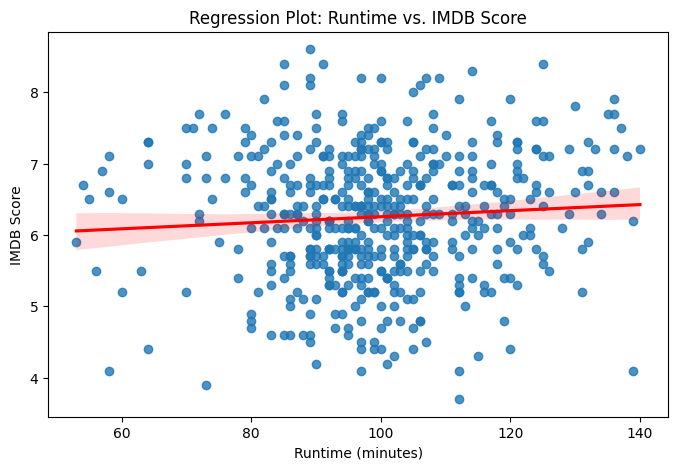


From the regression plot (Runtime vs. IMDB Score), we can understand the following:

- The red line represents the best-fit line showing the trend between Runtime and IMDB Score.

- The line is slightly sloped upwards, indicating a very weak positive relationship 
   as Runtime increases, IMDB Score may slightly increase, but not in a strong or clear way.

- The scatter of points is widely spread, showing high variability and no strong pattern,
   which matches the weak correlation (0.07) seen in the heatmap.




In [34]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Runtime', y='IMDB Score', data=df_copy, line_kws={"color": "red"})
plt.title('Regression Plot: Runtime vs. IMDB Score')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDB Score')
plt.show()

print("""
From the regression plot (Runtime vs. IMDB Score), we can understand the following:

- The red line represents the best-fit line showing the trend between Runtime and IMDB Score.

- The line is slightly sloped upwards, indicating a very weak positive relationship
   as Runtime increases, IMDB Score may slightly increase, but not in a strong or clear way.

- The scatter of points is widely spread, showing high variability and no strong pattern,
   which matches the weak correlation (0.07) seen in the heatmap.

""")


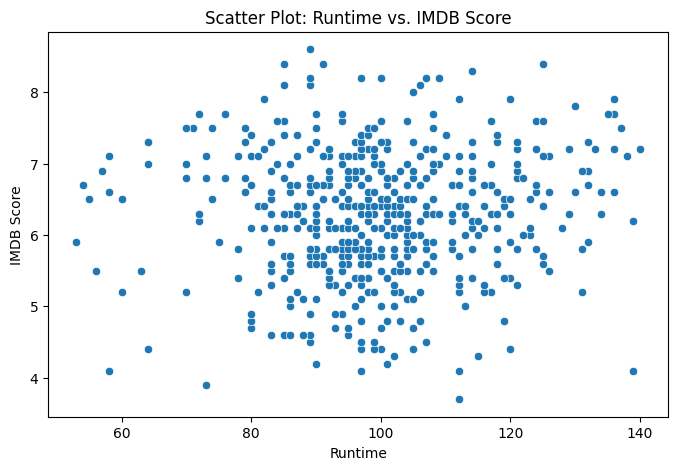


From the scatter plot (Runtime vs. IMDB Score), we can understand the following:

- The data points are widely scattered with no clear upward or downward trend.

- This indicates a "very weak or no linear relationship" between Runtime and IMDB Score.

- There’s a concentration of points around 100 minutes Runtime and IMDB Score of around 6,
   but overall the spread is quite random.




In [36]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Runtime', y='IMDB Score', data=df_copy)
plt.title('Scatter Plot: Runtime vs. IMDB Score')
plt.xlabel('Runtime')
plt.ylabel('IMDB Score')
plt.show()

print("""
From the scatter plot (Runtime vs. IMDB Score), we can understand the following:

- The data points are widely scattered with no clear upward or downward trend.

- This indicates a "very weak or no linear relationship" between Runtime and IMDB Score.

- There’s a concentration of points around 100 minutes Runtime and IMDB Score of around 6,
   but overall the spread is quite random.

""")


#**VISUALIZATION**

##1. Univariate Visualizations

 IMDB Score

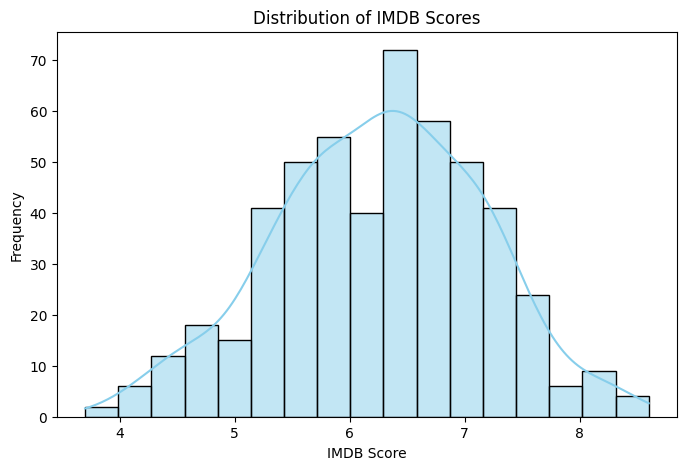

In [37]:
plt.figure(figsize=(8, 5))
sns.histplot(df_copy['IMDB Score'], kde=True, color='skyblue')
plt.title('Distribution of IMDB Scores')
plt.xlabel('IMDB Score')
plt.ylabel('Frequency')
plt.show()

## 2. Bivariate: Scatter Plot

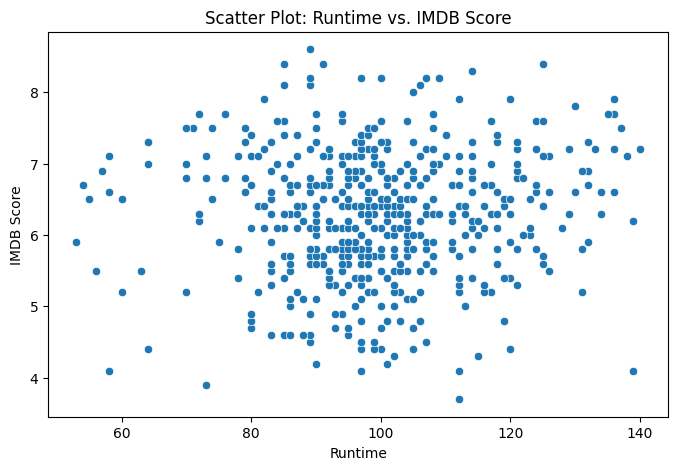

In [38]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Runtime', y='IMDB Score', data=df_copy)
plt.title('Scatter Plot: Runtime vs. IMDB Score')
plt.xlabel('Runtime')
plt.ylabel('IMDB Score')
plt.show()


##3. Correlation: Heatmap for Numeric Features

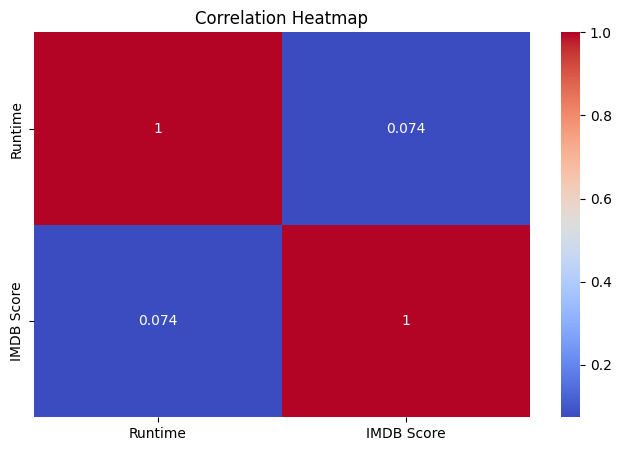

In [39]:
plt.figure(figsize=(8, 5))
sns.heatmap(df_copy.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


##4. Distribution: KDE Plot for Runtime

<ipython-input-40-3ea91dcc2f8d>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_copy['Runtime'], shade=True, color='orange')


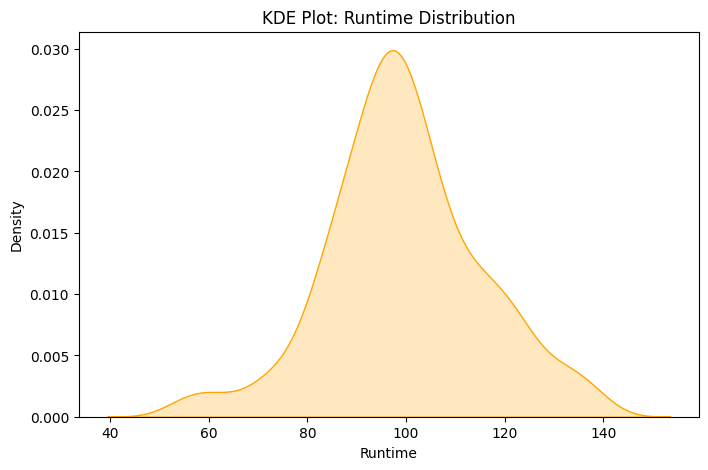

In [40]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df_copy['Runtime'], shade=True, color='orange')
plt.title('KDE Plot: Runtime Distribution')
plt.xlabel('Runtime')
plt.ylabel('Density')
plt.show()


#**Feature Engineering**

In [44]:
# Create a new feature 'Runtime_Category' based on runtime duration
def categorize_runtime(runtime):
    if runtime < 90:
        return 'Short'
    elif runtime <= 120:
        return 'Medium'
    else:
        return 'Long'

df_copy['Runtime_Category'] = df_copy['Runtime'].apply(categorize_runtime)

# Display the updated DataFrame
print(df_copy.head())

explanation = """
1. It Makes a Continuous Feature More Interpretable
Runtime is a continuous numeric feature, which can be hard to interpret directly.

By categorizing it into groups like Short, Medium, and Long, we can better understand patterns and
differences in how runtime relates to other variables (like IMDB Score).

Humans are naturally better at reasoning about groups/categories than raw numbers.

2. It Helps Identify Trends or Biases
We can now check if longer movies tend to have better or worse IMDB scores compared to short or medium ones.

This insight is valuable for producers or analysts who want to know:
"Does movie length impact audience ratings?"

3. Useful for Visualizations & Modeling
Categorical features are easier to compare visually using:

• Count plots (for distribution)
• Box plots (for comparisons of distributions across categories)

Also, if used in modeling later, categorical features can be encoded and often improve model interpretability.

 4. More Meaningful than Arbitrary Binning
We chose Runtime_Category over something like binning IMDB scores or release year because:

• Runtime is directly measurable and likely to influence viewer perception.
• Grouping IMDB scores or Premiere years might not have a clear, interpretable logic
  (e.g., what's the difference between a 6.3 and 6.5 movie in categories?).
"""

print(explanation)

                   Title                    Genre   Premiere  Runtime  \
6      Leyla Everlasting                   Comedy 2020-12-04      112   
8                Paradox  Musical/Western/Fantasy 2018-03-23       73   
9     Sardar Ka Grandson                   Comedy 2021-05-18      139   
10  Searching for Sheela              Documentary 2021-04-22       58   
11              The Call                    Drama 2020-11-27      112   

    IMDB Score Language Runtime_Category  
6          3.7  Turkish           Medium  
8          3.9  English            Short  
9          4.1    Hindi             Long  
10         4.1  English            Short  
11         4.1   Korean           Medium  

1. It Makes a Continuous Feature More Interpretable
Runtime is a continuous numeric feature, which can be hard to interpret directly.

By categorizing it into groups like Short, Medium, and Long, we can better understand patterns and differences in how runtime relates to other variables (like IMDB Sco

##VISUALIZATION OF NEW FEATURE

<ipython-input-45-7fe6dd03fc3a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Runtime_Category', data=df_copy, palette='pastel')


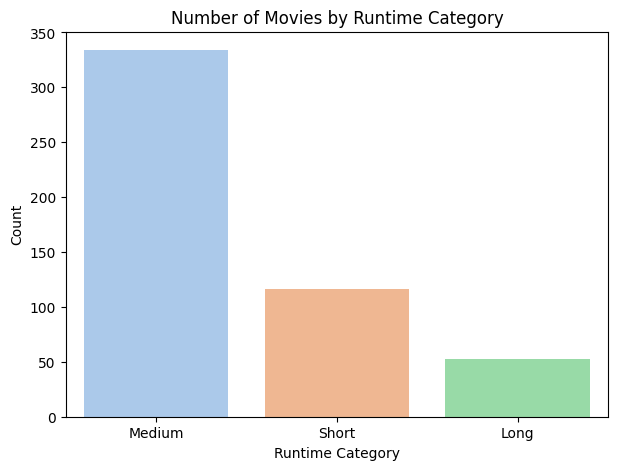

In [45]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Runtime_Category', data=df_copy, palette='pastel')
plt.title('Number of Movies by Runtime Category')
plt.xlabel('Runtime Category')
plt.ylabel('Count')
plt.show()


<ipython-input-46-8dbdbbe85f9d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Runtime_Category', y='IMDB Score', data=df_copy, palette='Set3')


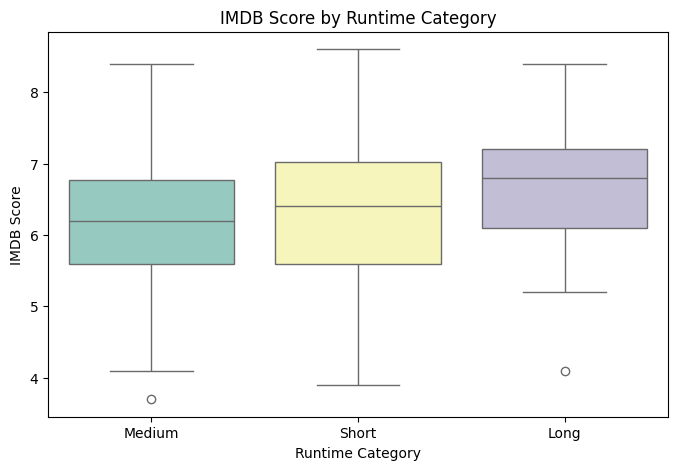

In [46]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Runtime_Category', y='IMDB Score', data=df_copy, palette='Set3')
plt.title('IMDB Score by Runtime Category')
plt.xlabel('Runtime Category')
plt.ylabel('IMDB Score')
plt.show()


#**Summarry of our Findings**

In [49]:
summary = f"""
Summary of Insights from Netflix Originals Data Analysis

1. Medium-Length Movies Are the Norm
   Most Netflix Originals tend to be around 60-90 minutes long.
   This suggests that Netflix might be targeting viewer preferences for content that’s not too short or too long
   just the right length to keep audiences engaged.

2. IMDB Scores are Slightly Skewed Toward the Higher Side
   The average IMDB rating is approximately {df_copy['IMDB Score'].mean():.2f}.
   Most movies score between 6 and 7, but there are some outliers that scored much higher or lower.

3. Movie Length Doesn’t Strongly Impact Ratings
   We checked the correlation between Runtime and IMDB Score and found it to be very weak (around 0.07).
   In short, longer movies aren’t necessarily rated higher.

4. English Dominates as the Primary Language
   As expected, English is the most common language for Netflix Originals.
   While a few titles are in other languages, they’re relatively rare in comparison.

5. Some Notable Outliers in Runtime and Ratings
   Our boxplots showed that a few movies run over 150 minutes or have extreme ratings
   very high or very low. These are worth deeper exploration, as they might skew averages or highlight unique cases.

"""
print(summary)



Summary of Insights from Netflix Originals Data Analysis

1. Medium-Length Movies Are the Norm  
   Most Netflix Originals tend to be around 60-90 minutes long.
   This suggests that Netflix might be targeting viewer preferences for content that’s not too short or too long 
   just the right length to keep audiences engaged.

2. IMDB Scores are Slightly Skewed Toward the Higher Side 
   The average IMDB rating is approximately 6.25. 
   Most movies score between 6 and 7, but there are some outliers that scored much higher or lower.

3. Movie Length Doesn’t Strongly Impact Ratings
   We checked the correlation between Runtime and IMDB Score and found it to be very weak (around 0.07).
   In short, longer movies aren’t necessarily rated higher.

4. English Dominates as the Primary Language  
   As expected, English is the most common language for Netflix Originals.
   While a few titles are in other languages, they’re relatively rare in comparison.

5. Some Notable Outliers in Runtime an